# Let's bring in the imports and the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('dark')
import sklearn
import tensorflow as tf
from tensorflow import keras

In [2]:
data_path = '../input/dont-call-me-turkey/train.json'
test_path = '../input/dont-call-me-turkey/test.json'

df = pd.read_json(data_path)
test_df = pd.read_json(test_path)

In [3]:
df.head()

,audio_embedding,is_turkey,vid_id,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
0,"[[172, 34, 216, 110, 208, 46, 95, 66, 161, 125...",0,kDCk3hLIVXo,70,60
1,"[[169, 20, 165, 102, 205, 62, 110, 103, 211, 1...",1,DPcGzqHoo7Y,40,30
2,"[[148, 8, 138, 60, 237, 48, 121, 108, 145, 177...",1,7yM63MTHh5k,240,230
3,"[[151, 0, 162, 88, 171, 71, 47, 90, 179, 190, ...",1,luG3RmUAxxM,520,510
4,"[[162, 17, 187, 111, 211, 105, 92, 67, 203, 15...",0,PIm3cjxTpOk,10,0


In [4]:
df.shape

(1195, 5)

In [5]:
test_df.head()

,audio_embedding,vid_id,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
0,"[[177, 20, 226, 132, 198, 81, 111, 59, 132, 18...",pyKh38FXD3E,10,0
1,"[[169, 21, 204, 161, 195, 72, 60, 39, 152, 184...",THhP1idrWXA,40,30
2,"[[165, 13, 198, 141, 199, 81, 173, 54, 119, 11...",jsw3T6GY2Nw,40,30
3,"[[167, 18, 188, 159, 198, 63, 156, 36, 179, 22...",nFkXTMHcjMU,24,14
4,"[[178, 32, 181, 100, 198, 46, 82, 83, 136, 227...",Au8g9kAlrLQ,40,30


In [6]:
test_df.shape

(1196, 4)

# Data preparation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   audio_embedding                  1195 non-null   object
 1   is_turkey                        1195 non-null   int64 
 2   vid_id                           1195 non-null   object
 3   end_time_seconds_youtube_clip    1195 non-null   int64 
 4   start_time_seconds_youtube_clip  1195 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


In [8]:
df.describe()

,is_turkey,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
count,1195.000000,1195.000000,1195.000000
mean,0.410879,87.013389,77.085356
std,0.492199,107.750860,107.697523
min,0.000000,2.000000,0.000000
25%,0.000000,40.000000,30.000000
50%,0.000000,40.000000,30.000000
75%,1.000000,90.000000,80.000000
max,1.000000,600.000000,590.000000


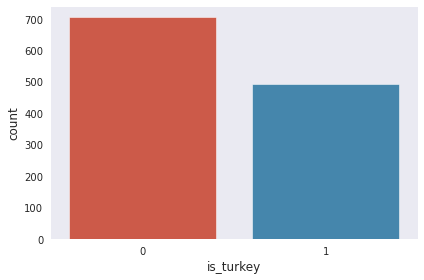

In [9]:
sns.countplot(df['is_turkey'])
plt.tight_layout()

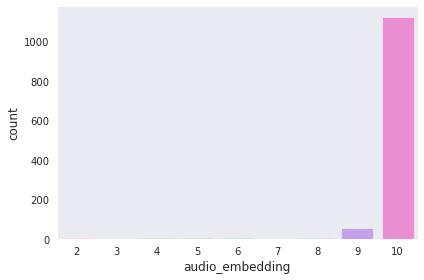

In [10]:
length = df['audio_embedding'].apply(len)

y = length
x = np.arange(1, len(length)+1)

sns.countplot(length)
plt.tight_layout()

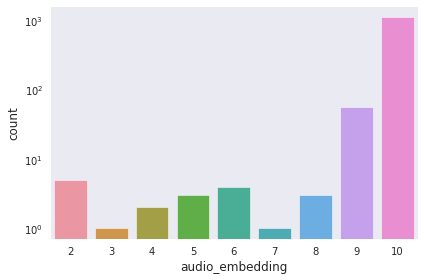

In [11]:
plt.yscale('log')
sns.countplot(length)
plt.tight_layout()

In [12]:
df.head()

,audio_embedding,is_turkey,vid_id,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
0,"[[172, 34, 216, 110, 208, 46, 95, 66, 161, 125...",0,kDCk3hLIVXo,70,60
1,"[[169, 20, 165, 102, 205, 62, 110, 103, 211, 1...",1,DPcGzqHoo7Y,40,30
2,"[[148, 8, 138, 60, 237, 48, 121, 108, 145, 177...",1,7yM63MTHh5k,240,230
3,"[[151, 0, 162, 88, 171, 71, 47, 90, 179, 190, ...",1,luG3RmUAxxM,520,510
4,"[[162, 17, 187, 111, 211, 105, 92, 67, 203, 15...",0,PIm3cjxTpOk,10,0


In [13]:
df['duration'] = df['end_time_seconds_youtube_clip'] = df['start_time_seconds_youtube_clip']
df.head()

,audio_embedding,is_turkey,vid_id,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip,duration
0,"[[172, 34, 216, 110, 208, 46, 95, 66, 161, 125...",0,kDCk3hLIVXo,60,60,60
1,"[[169, 20, 165, 102, 205, 62, 110, 103, 211, 1...",1,DPcGzqHoo7Y,30,30,30
2,"[[148, 8, 138, 60, 237, 48, 121, 108, 145, 177...",1,7yM63MTHh5k,230,230,230
3,"[[151, 0, 162, 88, 171, 71, 47, 90, 179, 190, ...",1,luG3RmUAxxM,510,510,510
4,"[[162, 17, 187, 111, 211, 105, 92, 67, 203, 15...",0,PIm3cjxTpOk,0,0,0


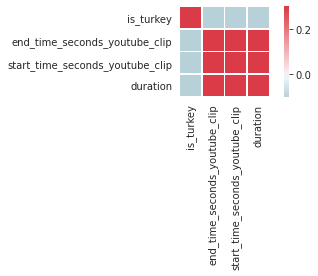

In [14]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)
plt.tight_layout()

# Data preprocessing

In [15]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 10

data = pad_sequences(df['audio_embedding'], maxlen=maxlen, padding='post')
labels = df['is_turkey'].values

In [16]:
from keras.utils import to_categorical

train_size = int((80/100) * df.shape[0])

train_data = data[: train_size]
train_labels = to_categorical(labels[: train_size])

valid_data = data[train_size: ]
valid_labels = to_categorical(labels[train_size: ])

assert(len(train_data) == len(train_labels))
assert(len(valid_data) == len(valid_labels))

In [17]:
train_data[0]

array([[172,  34, 216, ..., 129,   4, 255],
       [171,  39, 199, ..., 126, 188, 255],
       [169,  33, 200, ..., 205,  33, 255],
       ...,
       [164,  27, 201, ..., 142, 135, 255],
       [159,  21, 178, ..., 116, 215, 255],
       [165,  33, 188, ..., 101, 104, 255]], dtype=int32)

In [18]:
num_features = len(train_data[0][0])
num_features

128

In [19]:
train_labels[0]

array([1., 0.], dtype=float32)

In [20]:
test_data = pad_sequences(test_df['audio_embedding'], maxlen=maxlen, padding='post')
test_data[0]

array([[177,  20, 226, ..., 184,  48, 255],
       [168,  19, 221, ...,  36,  95, 255],
       [170,  21, 212, ..., 171, 131, 255],
       ...,
       [164,  26, 215, ...,  68,  78, 255],
       [166,  24, 219, ...,  50,  10, 255],
       [165,  25, 216, ..., 149,  19, 255]], dtype=int32)

# Building and compiling the model

In [21]:
def build_model():
    inp = keras.layers.Input(shape=(maxlen, num_features))
    x = keras.layers.BatchNormalization()(inp)
    
    x = keras.layers.Bidirectional( keras.layers.LSTM(128, return_sequences=True) )(x)
    x = keras.layers.Bidirectional( keras.layers.LSTM(64, return_sequences=True) )(x)
    
    avg_pool = keras.layers.GlobalAveragePooling1D()(x)
    max_pool = keras.layers.GlobalMaxPooling1D()(x)
    
    concat = keras.layers.concatenate([avg_pool, max_pool])
    
    hidden_1 = keras.layers.Dense(64)(concat)
    hidden_2 = keras.layers.Dropout(0.5)(hidden_1)
    hidden_activ = keras.layers.LeakyReLU()(hidden_2)
    
    output = keras.layers.Dense(2, activation="softmax")(hidden_activ)
    
    model = keras.Model(inputs=inp, outputs=output)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

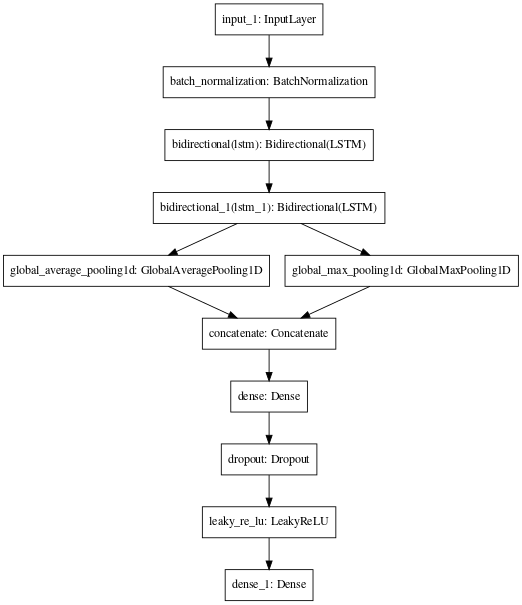

In [22]:
model = build_model()
keras.utils.plot_model(model, dpi=62)

# Training the model

In [23]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=2, verbose=1, min_lr=1e-8)

my_cb = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)

history = model.fit(train_data, train_labels, batch_size=64, epochs=100, 
                    validation_data=(valid_data, valid_labels), callbacks=[reduce_lr, my_cb], verbose=2)

Epoch 1/100
15/15 - 1s - loss: 0.3020 - acc: 0.8902 - val_loss: 0.2281 - val_acc: 0.8996
Epoch 2/100
15/15 - 0s - loss: 0.1471 - acc: 0.9561 - val_loss: 0.3106 - val_acc: 0.8703
Epoch 3/100

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
15/15 - 0s - loss: 0.0943 - acc: 0.9697 - val_loss: 0.4536 - val_acc: 0.8326
Epoch 4/100
15/15 - 0s - loss: 0.0635 - acc: 0.9812 - val_loss: 0.3221 - val_acc: 0.8828
Epoch 5/100

Epoch 00005: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
15/15 - 0s - loss: 0.0530 - acc: 0.9864 - val_loss: 0.2951 - val_acc: 0.8954
Epoch 6/100
15/15 - 0s - loss: 0.0556 - acc: 0.9854 - val_loss: 0.2310 - val_acc: 0.9121
Epoch 7/100
15/15 - 0s - loss: 0.0554 - acc: 0.9843 - val_loss: 0.1783 - val_acc: 0.9289
Epoch 8/100
15/15 - 0s - loss: 0.0463 - acc: 0.9874 - val_loss: 0.1343 - val_acc: 0.9372
Epoch 9/100
15/15 - 0s - loss: 0.0522 - acc: 0.9822 - val_loss: 0.1015 - val_acc: 0.9540
Epoch 10/100
15/15 - 0s - loss: 0.0

In [24]:
epochs = len(history.history['loss'])
epochs

21

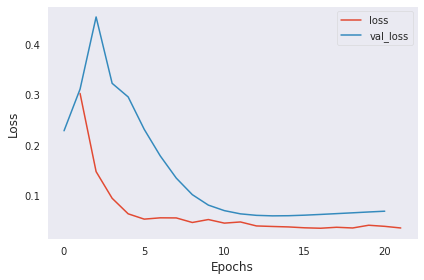

In [25]:
y1 = history.history['loss']
y2 = history.history['val_loss']
x = np.arange(1, epochs+1)

plt.plot(x, y1, y2)
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()

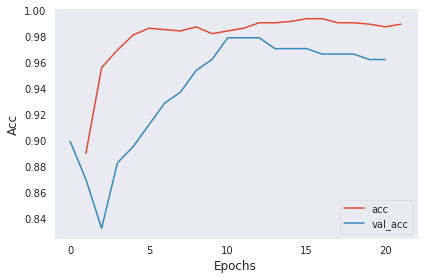

In [26]:
y1 = history.history['acc']
y2 = history.history['val_acc']
x = np.arange(1, epochs+1)

plt.plot(x, y1, y2)
plt.legend(['acc', 'val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.tight_layout()

In [27]:
model.evaluate(valid_data, valid_labels)

8/8 [==============================] - 0s 4ms/step - loss: 0.0698 - acc: 0.9791


[0.06981539726257324, 0.9790794849395752]

# Make predictions

In [28]:
predictions = np.argmax(model.predict(test_data), axis=1)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
submission = pd.DataFrame({'vid_id': test_df['vid_id'], 'is_turkey': predictions})
submission.head()

,vid_id,is_turkey
0,pyKh38FXD3E,0
1,THhP1idrWXA,0
2,jsw3T6GY2Nw,0
3,nFkXTMHcjMU,0
4,Au8g9kAlrLQ,1


In [30]:
submission.to_csv('submission.csv', index=False)